In [139]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Ayushi_Kansara\AppData\Local\Temp\pip-install-_n46ncgd\tensorflow-gpu_4b1a0319e8524a5db00fef04ab943566\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could

In [140]:
import tensorflow as tf
import os

In [141]:
# gpus = tf.config.experimental.list_physical_devices('CPU')
# len(gpus)

In [142]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [143]:
import cv2
import imghdr

In [144]:
data_dir = "data"
image_exts = ["jpeg", "png", "bmp", "png"]

In [145]:
# import matplotlib.pyplot as plt
# img = cv2.imread(os.path.join('data', 'geto', "Getou.Suguru.full.3251049.jpg"))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [146]:
for img_class in os.listdir(data_dir):    # for cat and dog
    for image in os.listdir(os.path.join(data_dir, img_class)):  #for each image
        image_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(image_path)   #converts to numpy array pewpew
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('Issue with image {}'.format(image_path)) 
            os.remove(image_path)

In [147]:
# tf.data.Dataset??

In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)  #building data pipeline

Found 172 files belonging to 2 classes.


In [150]:
data_iterator = data.as_numpy_iterator()  #allows access
batch = data_iterator.next()              #gives access

In [151]:
print(batch[0].shape)
batch[0]

(32, 256, 256, 3)


array([[[[227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         ...,
         [229.       , 222.       , 214.       ],
         [229.       , 222.       , 214.       ],
         [228.       , 221.       , 213.       ]],

        [[227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         ...,
         [229.       , 222.       , 214.       ],
         [229.       , 222.       , 214.       ],
         [229.       , 222.       , 214.       ]],

        [[227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         [227.       , 220.       , 212.       ],
         ...,
         [229.       , 222.       , 214.       ],
         [229.       , 222.       , 214.       ],
         [229.       , 222.       , 214.       ]],

        ...,

        [[225.       , 221.       , 21

In [152]:
batch[1]  
#images at index 0 and labels at index 1 

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

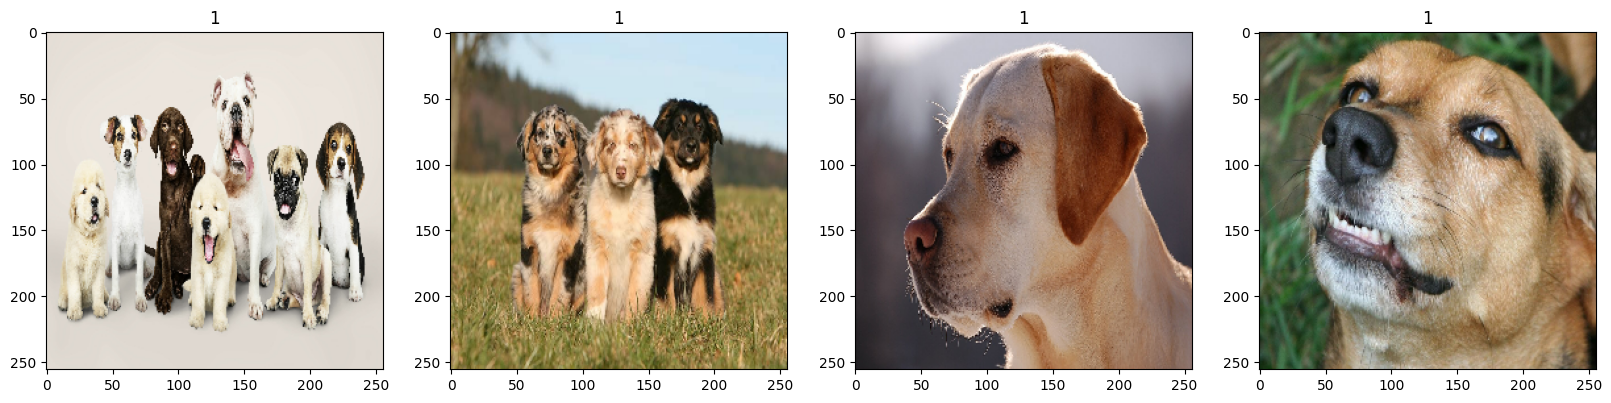

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 0 = kitty
# 1 = doggie


In [154]:
# pre processing
data = data.map(lambda x, y: (x/255, y))

In [155]:
scaled_iterator = data.as_numpy_iterator()

In [156]:
batch = scaled_iterator.next()

In [157]:
# batch[0].max()

In [158]:
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

In [159]:
# splitting into train and test sets
len(data)  # 9 batches of 32 images each 

6

In [160]:
# take and skip are features of tensorflow pipelines to help build training, validation and test sets
train = data.take(4)
val = data.skip(5).take(1)
test = data.skip(5).take(1)

In [161]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Convolutional Neural Network, Max Pooling condenses the data and "pools" 
# the regions together varna outputs become unmanageable (just like life ahaahaha)

In [162]:
model = Sequential()  

In [163]:
# adding layers 
# parameters = no. of kernels, size of kernels, stride, activation func

#convolution block 1
model.add(Conv2D(16, (3, 3), 1, activation = "relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

#convolution block 2
model.add(Conv2D(32, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

#convolution block 3
model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

# flattening reduces the output for it to be passed through Dense
model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [164]:
def binary_crossentropy_loss(y_true, y_pred):
    return tf.losses.binary_crossentropy(y_true, y_pred)

In [165]:
model.compile(optimizer='adam', loss=binary_crossentropy_loss, metrics=['accuracy'])


In [166]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 16)       

In [167]:
logdir='logs'

In [168]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [169]:
trained_model = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20


4/4 [==============================] - 10s 2s/step - loss: 1.2576 - accuracy: 0.5000 - val_loss: 0.7412 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7118 - accuracy: 0.5156 - val_loss: 0.7472 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.7252 - val_accuracy: 0.1667
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6746 - accuracy: 0.5156 - val_loss: 0.7145 - val_accuracy: 0.3333
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 0.6620 - accuracy: 0.6328 - val_loss: 0.6457 - val_accuracy: 0.9167
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.6168 - accuracy: 0.8125 - val_loss: 0.5817 - val_accuracy: 0.6667
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.5750 - accuracy: 0.7109 - val_loss: 0.6016 - val_accuracy: 0.6667
Epoch 8/20
4/4 [==============================] - 7

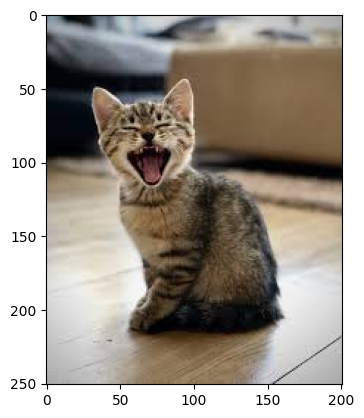

In [186]:
#testing on test set
img1 = cv2.imread('test_kitty.png')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

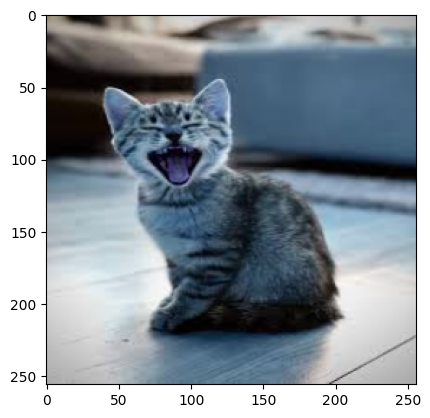

In [192]:
resize1 = tf.image.resize(img1, (256, 256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [198]:
input1 = np.expand_dims(resize1/255, 0)
ypred1 = model.predict(input1)
# ypred1
if ypred1[0] < 0.5:
    print("CAT")
else:
    print("DOG")

1/1 [==============================] - 0s 45ms/step


array([[0.05678119]], dtype=float32)

[]

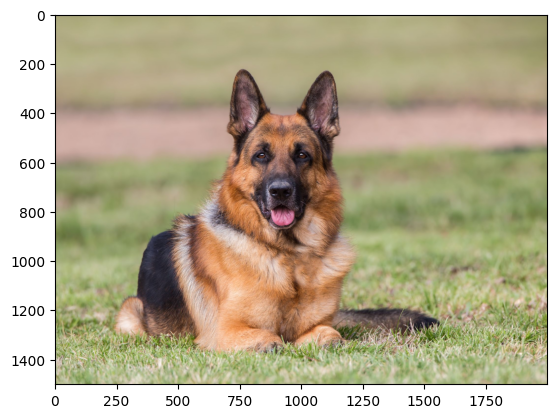

In [199]:
img2 = cv2.imread('test_puppy2.jpeg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.plot()

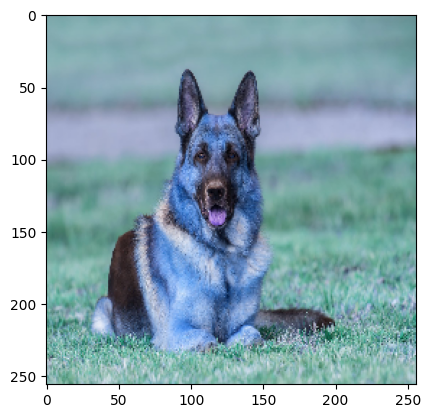

In [200]:
resize2 = tf.image.resize(img2, (256, 256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [203]:
input2 = np.expand_dims(resize2/255, 0)
ypred2 = model.predict(input2)
# ypred2
if ypred2[0] < 0.5:
    print("CAT")
else:
    print("DOG")

1/1 [==============================] - 0s 46ms/step
DOG
